**Descriptive Statistics:**


In [3]:
import ast
import pandas as pd

file_path = 'extracted_features.csv'  # Replace with the actual path to your file

data = pd.read_csv(file_path)
# Convert the Mean_Color from string to actual list of floats
data['Mean_Color'] = data['Mean_Color'].apply(ast.literal_eval)

# Extract R, G, B values into separate columns
data[['Mean_Red', 'Mean_Green', 'Mean_Blue']] = pd.DataFrame(data['Mean_Color'].tolist(), index=data.index)

# Drop the original Mean_Color and Text columns as they are not needed for analysis
data_cleaned = data.drop(columns=['Mean_Color', 'Text'])

# Display basic descriptive statistics for the numerical columns
descriptive_stats = data_cleaned.describe()

# Display the first few rows of the cleaned dataset and the descriptive statistics
data_cleaned.head(), descriptive_stats


(     Image  Num_Contours  Num_Edges    Mean_Red  Mean_Green   Mean_Blue
 0    0.jpg             1    1379040  119.874641  118.121433  129.385882
 1    1.jpg             1    1453755  120.314832  118.462333  129.440868
 2   10.jpg             1    1320645  119.339346  117.543088  128.582350
 3  100.jpg             1    1001130  107.668029  108.692323  119.959861
 4  101.jpg             1     992715  107.865713  109.130899  119.793188,
        Num_Contours     Num_Edges    Mean_Red  Mean_Green   Mean_Blue
 count         244.0  2.440000e+02  244.000000  244.000000  244.000000
 mean            1.0  1.264135e+06  118.172655  117.061002  128.692465
 std             0.0  1.599472e+05    3.523292    2.770861    3.439887
 min             1.0  9.516600e+05  107.668029  108.692323  119.793188
 25%             1.0  1.137491e+06  116.285769  114.988854  126.760224
 50%             1.0  1.269900e+06  118.714037  117.394133  129.105558
 75%             1.0  1.392236e+06  120.758545  118.704983  131.

Descriptive Statistics:
Num_Contours:

All images have exactly 1 contour.
This column has no variance, and hence it may not be very informative for analysis.
Num_Edges:

The number of edges in images varies, with a mean of approximately 1,264,135.
The minimum number of edges is 951,660, and the maximum is 1,608,540.
Mean_Red, Mean_Green, Mean_Blue:

The mean red, green, and blue color values in images also vary.
The mean values for red, green, and blue are approximately 118.17, 117.06, and 128.69, respectively.

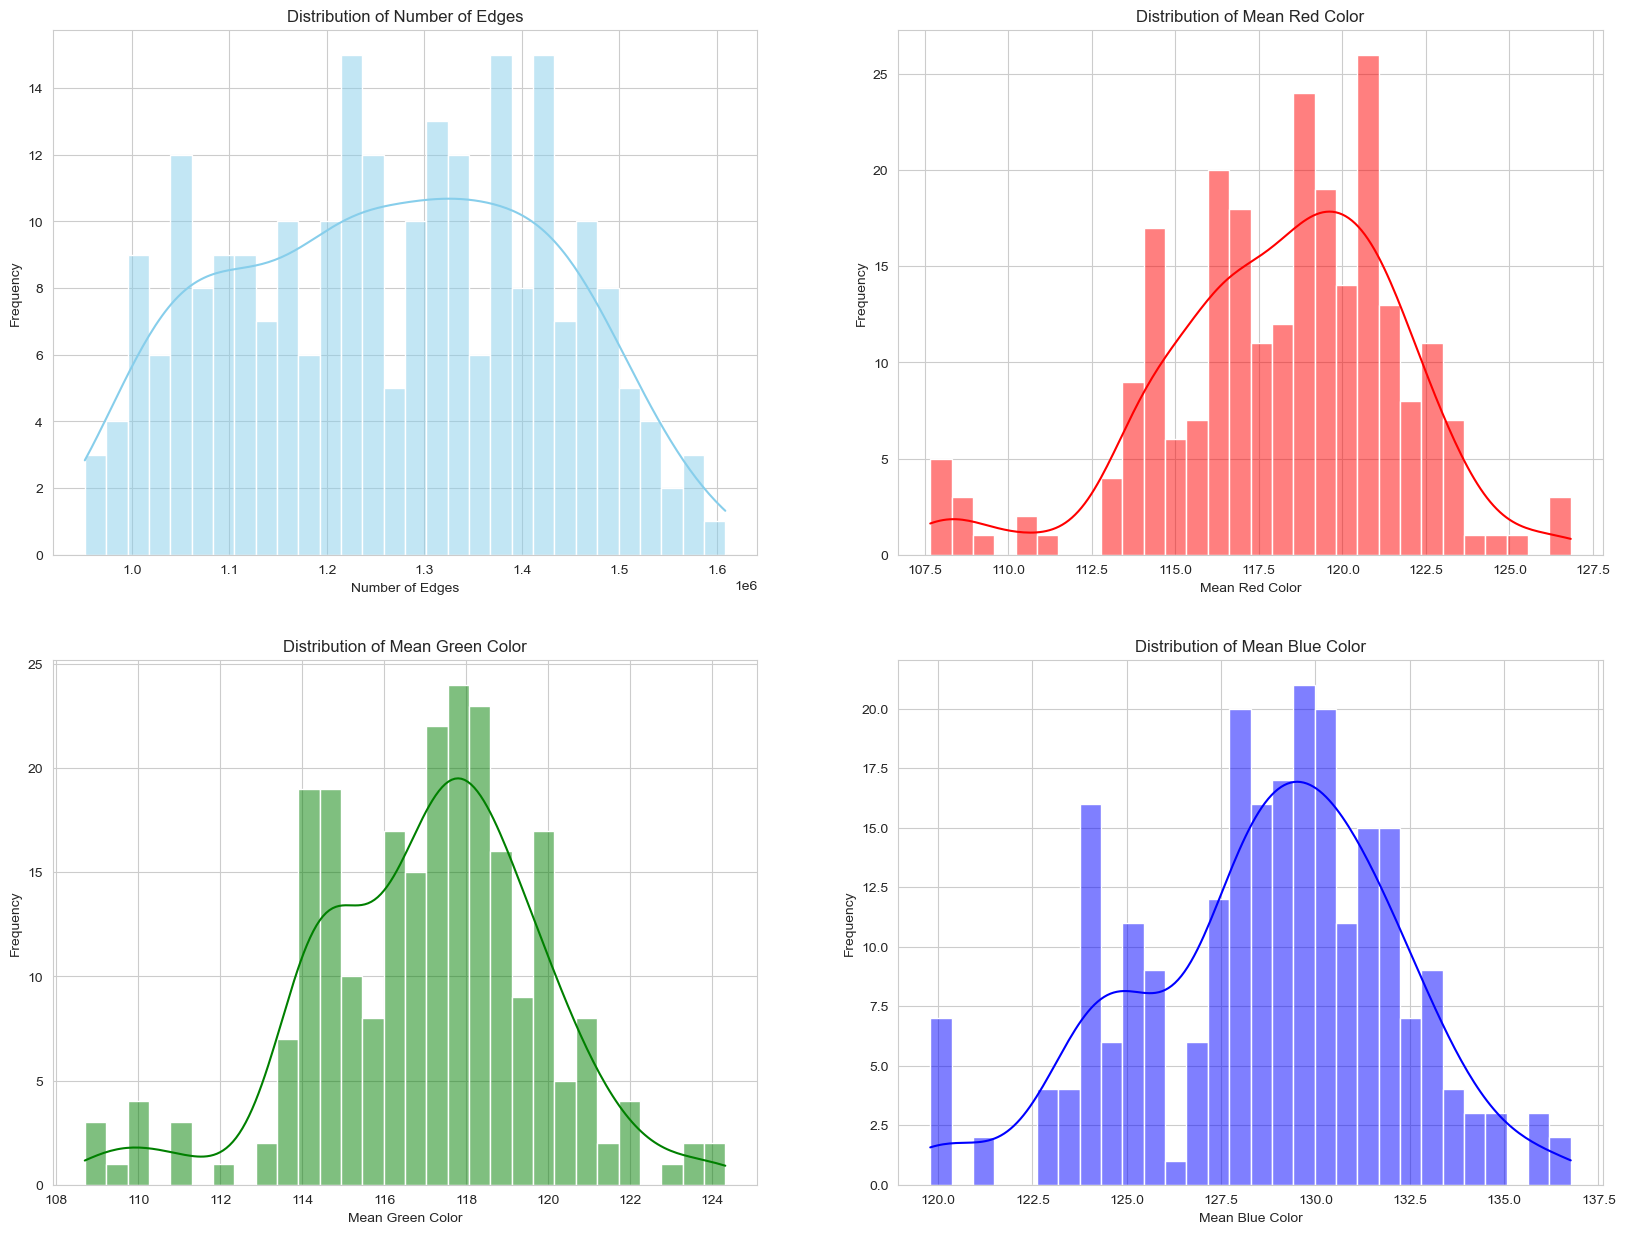

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots for each of the numerical columns
plt.subplot(2, 2, 1)
sns.histplot(data_cleaned['Num_Edges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Edges')
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data_cleaned['Mean_Red'], bins=30, kde=True, color='red')
plt.title('Distribution of Mean Red Color')
plt.xlabel('Mean Red Color')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data_cleaned['Mean_Green'], bins=30, kde=True, color='green')
plt.title('Distribution of Mean Green Color')
plt.xlabel('Mean Green Color')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(data_cleaned['Mean_Blue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Mean Blue Color')
plt.xlabel('Mean Blue Color')
plt.ylabel('Frequency')
plt.savefig('Distribution of Number of Edges.png')  # Save the bar chart to a file
plt.savefig('Distribution of Mean Red Color.png')  # Save the bar chart to a file
plt.savefig('Distribution of Mean Blue Color.png')  # Save the bar chart to a file
plt.savefig('Distribution of Mean Green Color.png')  # Save the bar chart to a file

# Show the plots
plt.show()


The histograms above illustrate the distributions of the numerical features in the dataset:

**Number of Edges Distribution:**

The number of edges in the images seems to follow a somewhat normal distribution, with a peak around 1,250,000 to 1,300,000 edges.
Mean Red Color Distribution:

The mean red color values distribution is somewhat normally distributed, with a peak around 118 to 120.
Mean Green Color Distribution:

The distribution of mean green color values is also approximately normal, with a peak around 117.
Mean Blue Color Distribution:

The distribution of mean blue color values is somewhat right-skewed, with a peak around 129 to 130.


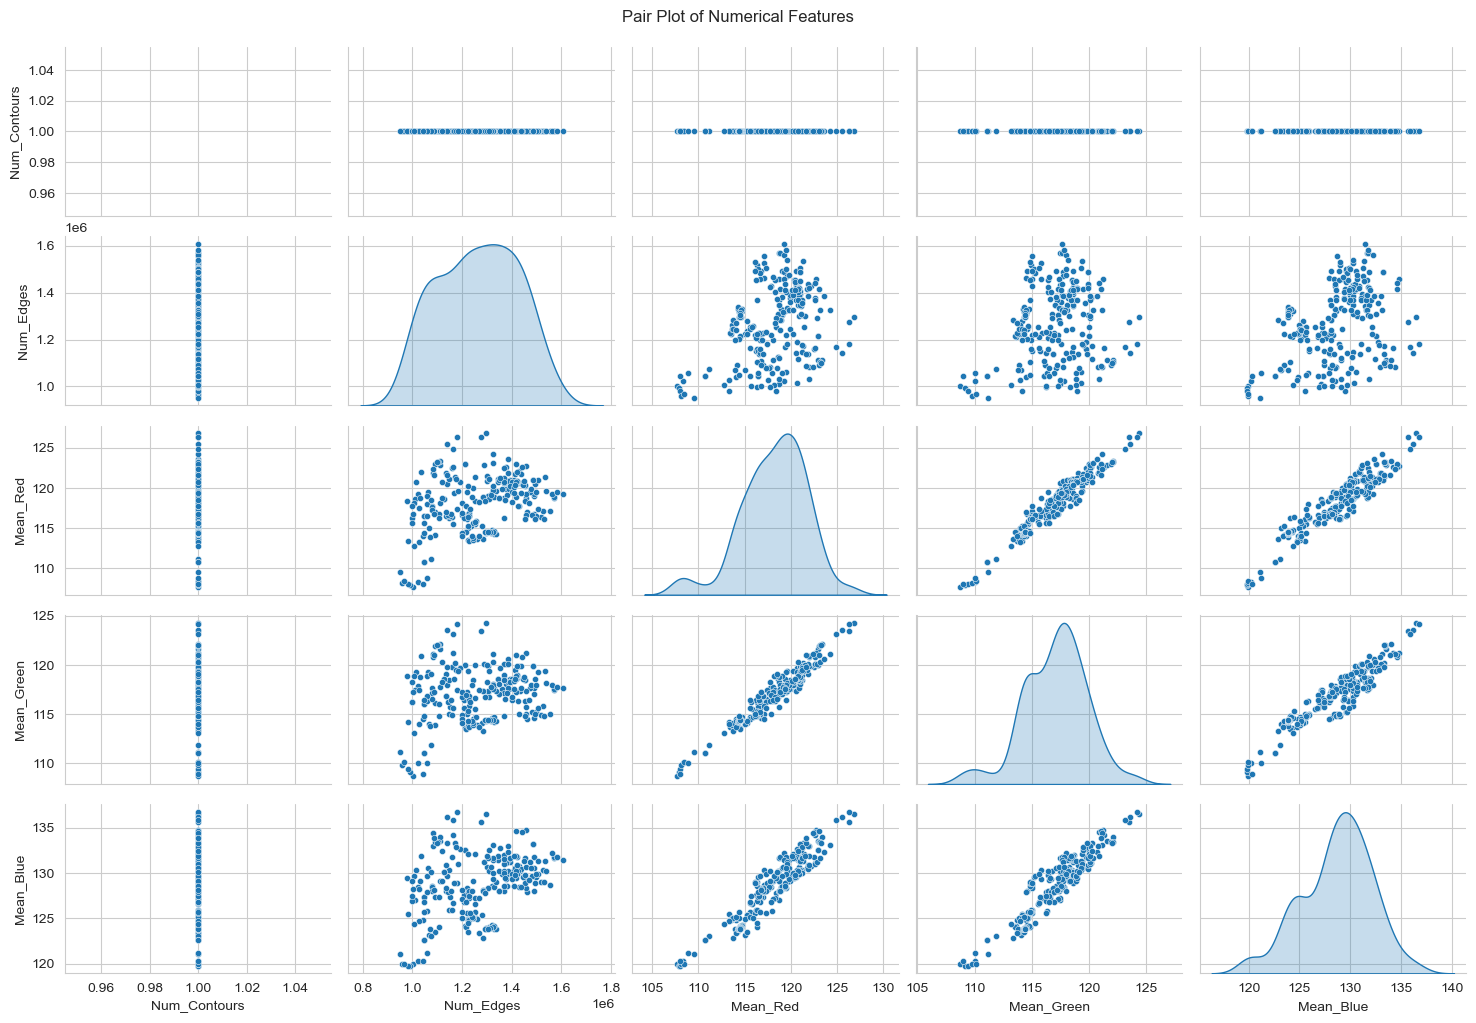

In [8]:
# Pair plot of numerical features
sns.pairplot(data_cleaned.drop(columns=['Image']), diag_kind='kde', height=2, aspect=1.5, plot_kws={'s': 20})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.savefig('Pair Plot of Numerical Features.png')  # Save the bar chart to a file

plt.show()


The pair plot provides an overview of the relationships and distributions of the numerical features:

**Distributions (Diagonal):**

The diagonal histograms represent the distributions of each variable, which we previously discussed.
Relationships (Off-Diagonal):

There seems to be a positive correlation between the mean color values (Mean_Red, Mean_Green, and Mean_Blue). When the mean value of one color increases, the mean values of the other colors tend to increase as well.
However, there isn’t a clear correlation between the Num_Edges and the mean color values. The points are dispersed without a distinct pattern.


**Insights:**
The images’ mean color values are correlated, indicating that images with higher mean red values also tend to have higher mean green and blue values. This may suggest that the images are generally balanced in terms of color.
The number of edges in the images does not show a clear relationship with the mean color values.


In [6]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image         244 non-null    object 
 1   Num_Contours  244 non-null    int64  
 2   Num_Edges     244 non-null    int64  
 3   Mean_Red      244 non-null    float64
 4   Mean_Green    244 non-null    float64
 5   Mean_Blue     244 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 11.6+ KB
